# **Laboratorio 6: Máquinas de Soporte Vectorial**

David Cardenas Peña, PhD.

Edificio de Ingeniería Eléctrica, Oficina 1B-131

email: dcardenasp@utp.edu.co

## Objetivos del laboratorio:

*    Identificar los elementos de las máquinas de soporte vectorial y su labor.
*   Apropiarse de una estrategia de sintonización de parámetros libres de los modelos empleando técnicas de validación.




In [1]:
import numpy as np
from time import sleep

from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs,  load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from IPython.display import clear_output
import matplotlib.pyplot as plt

from sklearn.svm import SVC


## Funciones auxiliares

Crean las bases de datos y hacen las gráficas

In [2]:
def linear():
  X, y = make_blobs(n_samples=100, centers=2, random_state=6)

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def easy():
  #Load database
  X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
  rng = np.random.RandomState(50)
  X += 3 * rng.uniform(size=X.shape)

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)


  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid


def moons():
  #Load database
  X, y = make_moons(noise=0.2, random_state=10,n_samples=400)

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)


  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def blobs():
  #Load database
  X, y = make_blobs(n_samples=200, centers=2, random_state=0)
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def three_blobs():
  #Load database
  X, y = make_blobs(n_samples=500, centers=3, random_state=2)
  y = y==2

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def circles():
  #Load database
  X, y = make_circles(n_samples=1000, factor=.5,  noise=.1)
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def plot_svm(X_train,t_train,X_test,t_test,X_grid=None,y_grid=None,boundaries=None,supports=None):

  if X_grid is not None:
    X1 = X_grid[:,0].reshape([1000,1000])
    X2 = X_grid[:,1].reshape([1000,1000])
    cs = plt.contour(X1, X2, y_grid.reshape(X1.shape),boundaries)
    plt.clabel(cs, inline=True, fontsize=10)

  plt.scatter(X_train[:,0], X_train[:,1], c=t_train , cmap=plt.cm.Paired ,label='Train',marker='o',facecolors='none',s=30)
  plt.scatter(X_test[:,0], X_test[:,1], c=t_test , cmap=plt.cm.Paired ,label='Test',marker='x',s=30)

  if supports is not None:
    plt.scatter(supports[:,0],supports[:,1],facecolors='none', edgecolors='k',label='supports')

  plt.legend()

  plt.show()

  return

def plot_mnist(X,t,y,ind):
  img = X.iloc[ind,:].to_numpy().reshape(28,28)
  plt.imshow(img,cmap=plt.get_cmap('gray'))
  plt.title('Label: {}, Prediction: {}'.format(t[ind],y[ind]))
  plt.show()

(66, 2) (66,) (34, 2) (34,) (1000000, 2)


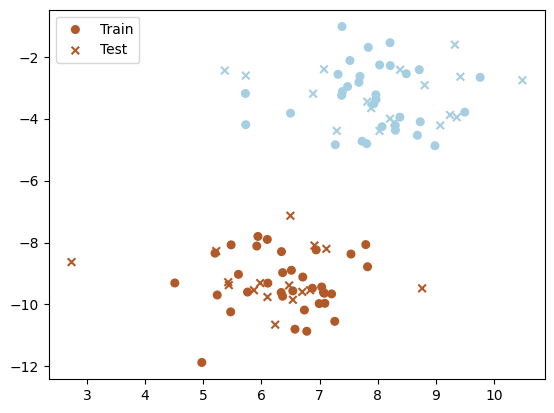

(66, 2) (66,) (34, 2) (34,) (1000000, 2)


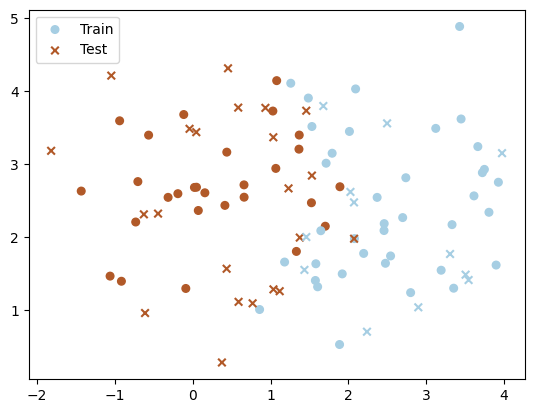

(266, 2) (266,) (134, 2) (134,) (1000000, 2)


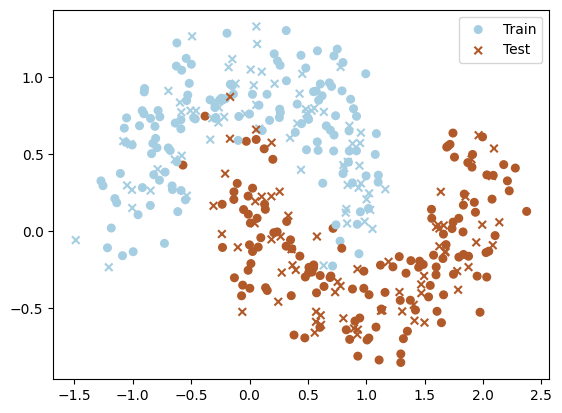

(133, 2) (133,) (67, 2) (67,) (1000000, 2)


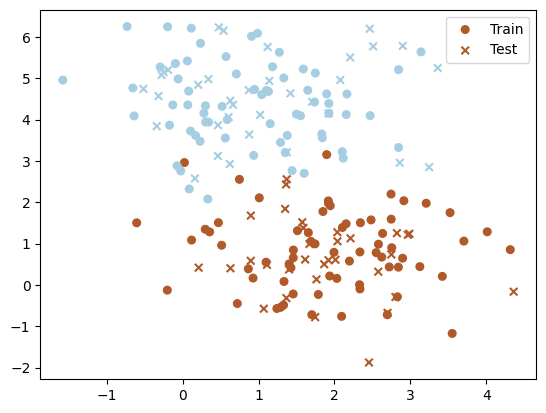

(333, 2) (333,) (167, 2) (167,) (1000000, 2)


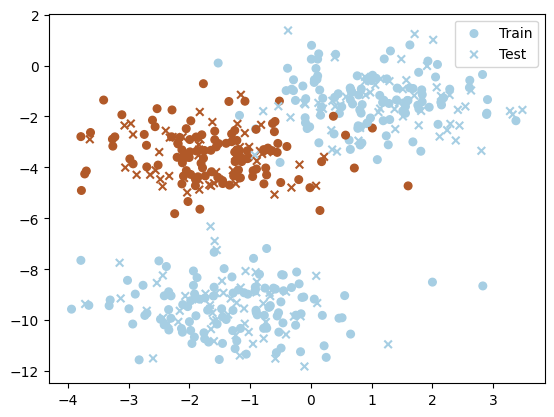

(666, 2) (666,) (334, 2) (334,) (1000000, 2)


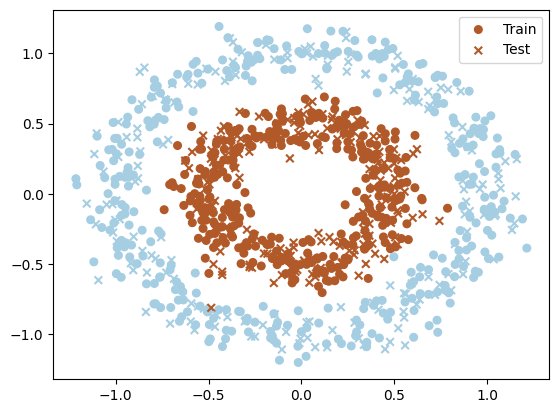

In [3]:
for X_train,t_train,X_test,t_test,X_grid in [linear(),easy(),moons(),blobs(),three_blobs(),circles()]:

  print(X_train.shape,t_train.shape,X_test.shape,t_test.shape,X_grid.shape)
  plot_svm(X_train,t_train,X_test,t_test)

# Actividad 1:

Consulte cómo usar el módulo Support Vector Machine de scikit-learn
(sklearn.svm.SVC) para entrenar clasificadores SVM.

¿Cómo se usan los métodos fit() y decision_function()?

¿Qué información proveen los atributos coef_, dual_coef_, n_support_ y support_vectors_?

¿Qué tipo de kernels acepta el módulo SVM de scikit-learn? ¿Cuáles son
sus parámetros y qué significan?

# Actividad 2:

Use el módulo Support Vector Machine de scikit-learn (sklearn.svm.SVC) para entrenar una SVM de clasificación con kernel **lineal** y **C=1**.

Grafique:
1.   Los vectores de soporte
2.   La frontera de  decisión
3.   La margen

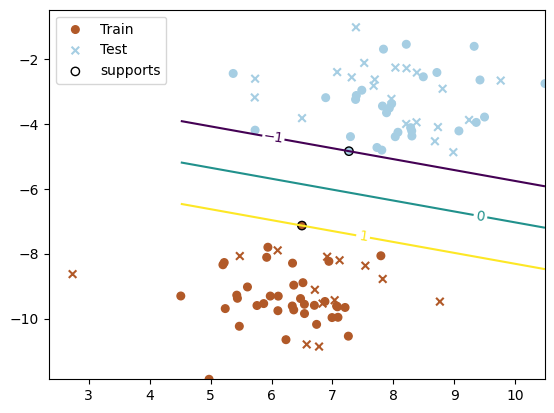

[[-0.34165099  0.34165099]]


In [4]:
X_train,t_train,X_test,t_test,X_grid = linear()

clf = SVC(kernel='linear',C=1.0).fit(X_train,t_train)

y_grid = clf.decision_function(X_grid) #Resultado de decision_function en X_grid

supports = clf.support_vectors_ # Resultado del atributo support_vectors_

boundaries = [-1,0,1] #Tres valores, uno para la margen izquierda, otro para la frontera y otro para la margen derecha

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)
print(clf.dual_coef_)

# Actividad 3:
A partir la actividad 2, reduzca el valor de la restricción $C$ paulatinamente hasta 0.01. Deben de probar varios valores de $C\in[0.01,1]$, los pasos lo deciden ustedes.

Grafique Los multiplicadores de lagrange del problema dual en un `stem` usando diferentes valores de $C$.

**NOTA**: Debe hacer `reshape(-1,)` a los multiplicadores para que el método `stem` funcione.

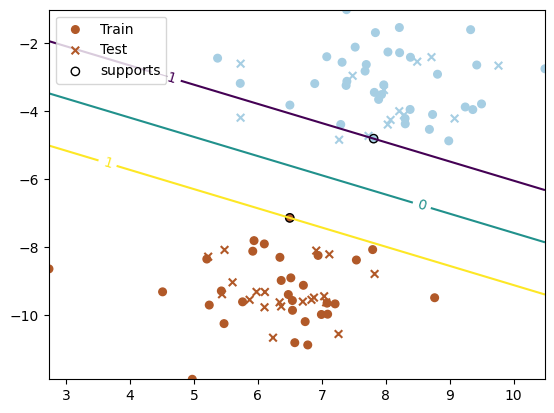

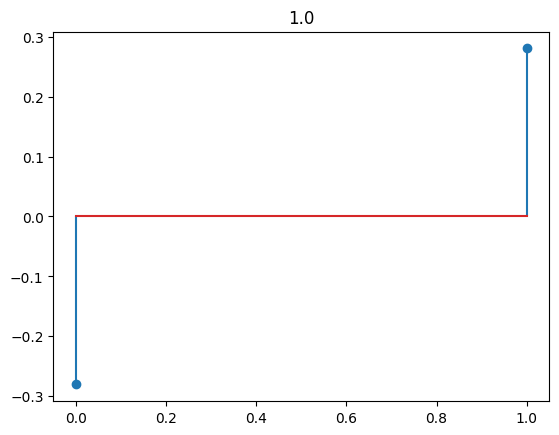

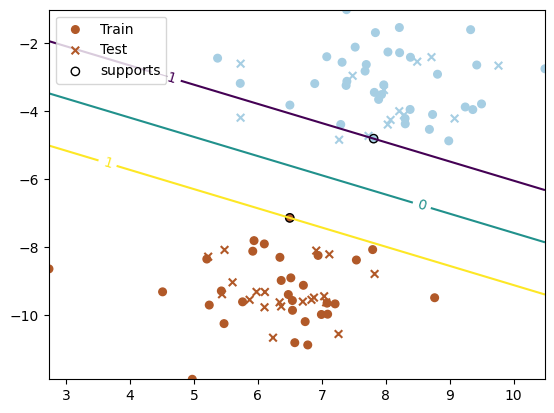

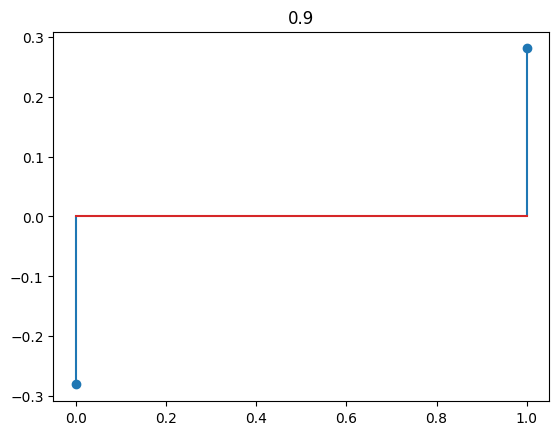

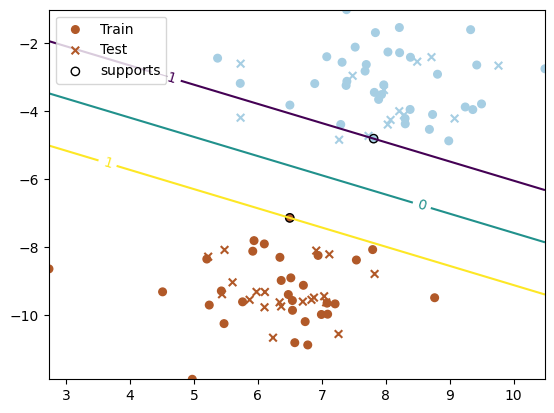

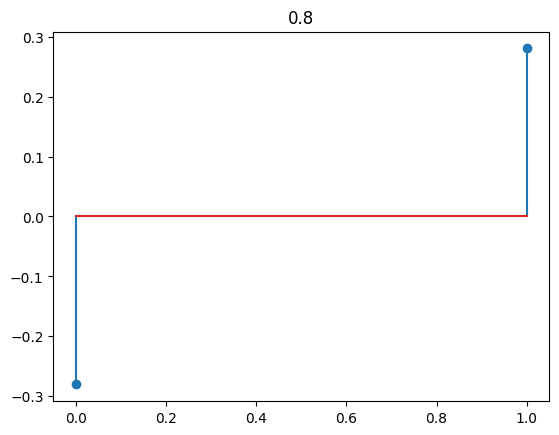

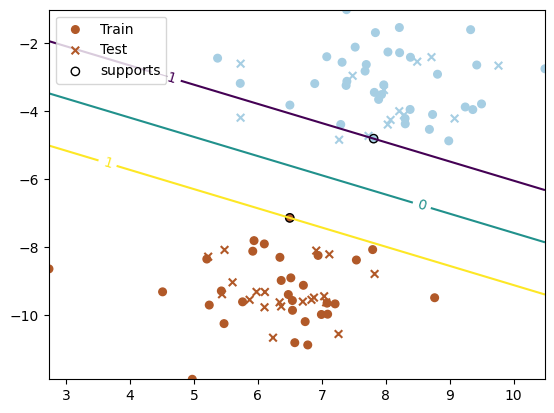

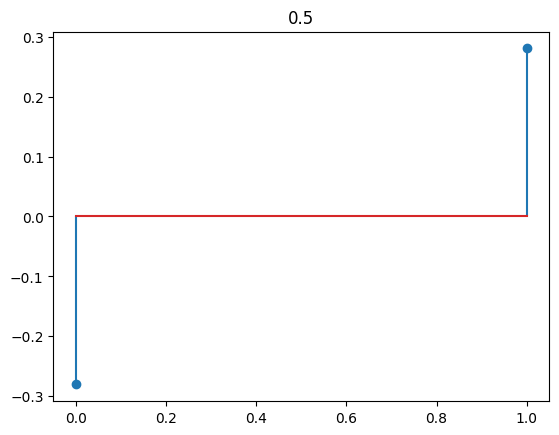

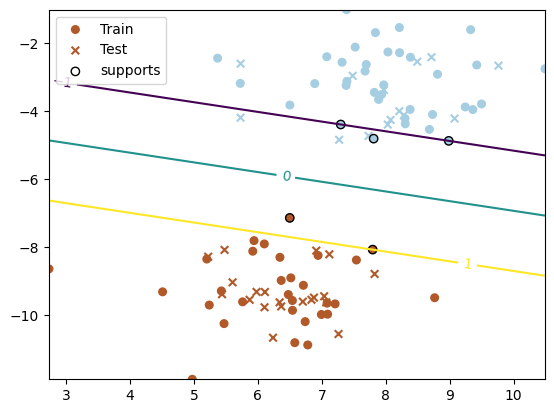

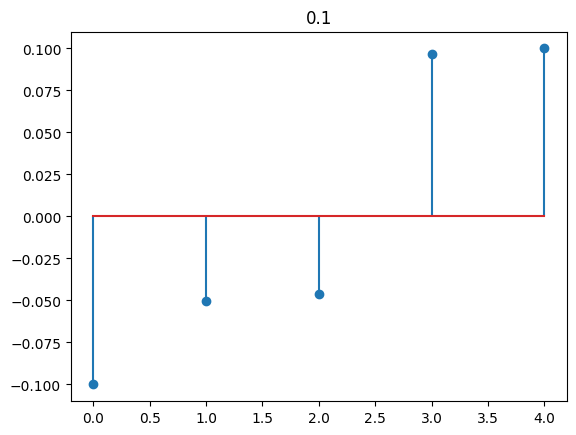

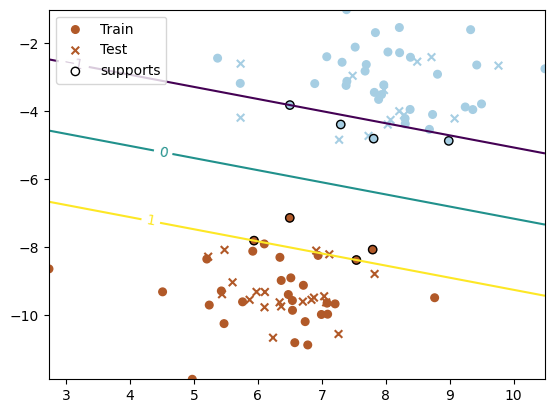

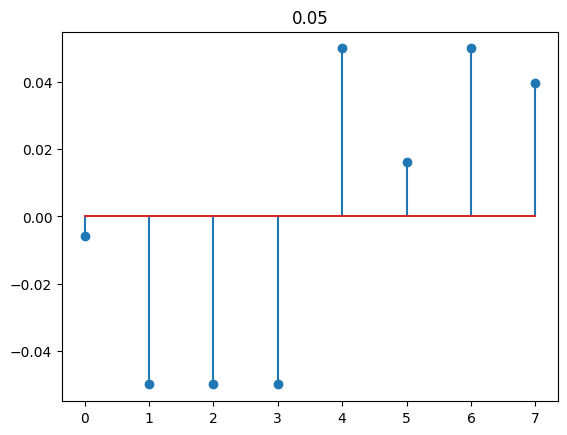

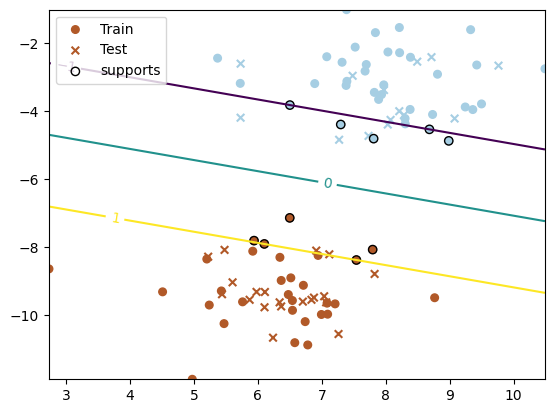

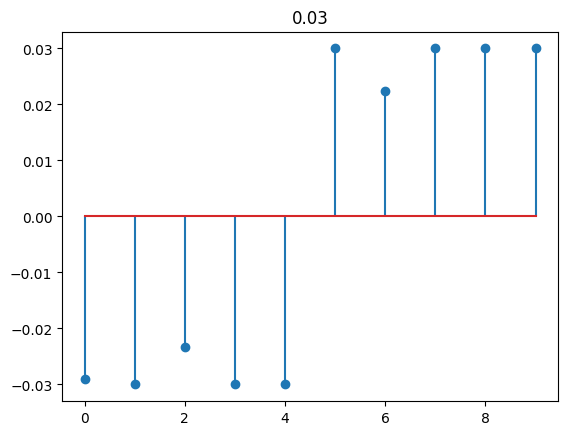

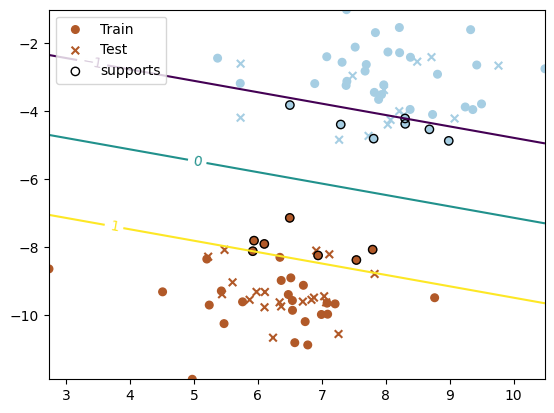

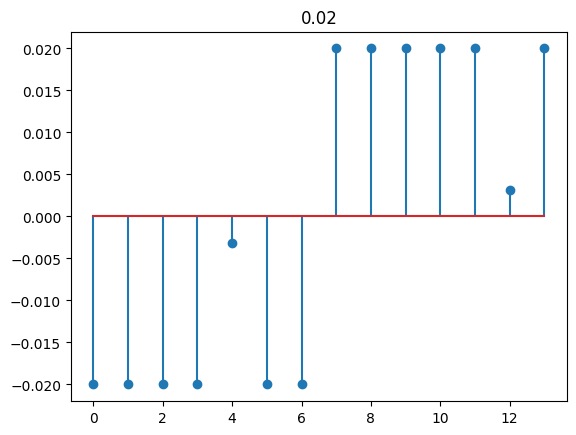

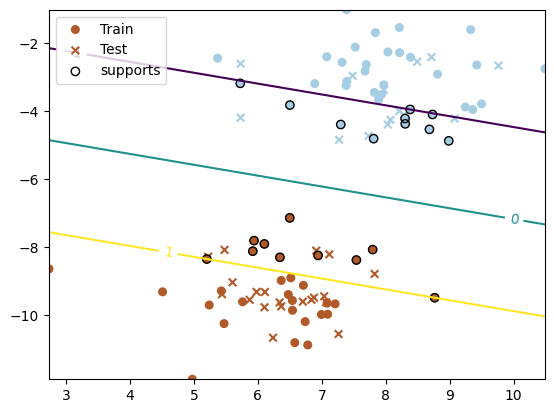

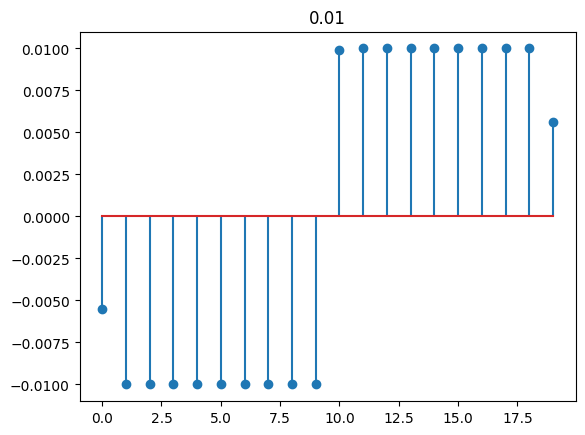

In [5]:
X_train,t_train,X_test,t_test,X_grid = linear()

for C in [1.0,0.9,0.8,0.5,0.1,0.05,0.03,0.02,0.01]:

  clf = SVC(kernel='linear',C=C).fit(X_train,t_train)

  y_grid = clf.decision_function(X_grid) #Resultado de decision_function en X_grid

  supports = clf.support_vectors_ # Resultado del atributo support_vectors_

  boundaries = [-1,0,1] #Tres valores, uno para la margen izquierda, otro para la frontera y otro para la margen derecha

  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)
  plt.show()

  #Cree a continación una gráfica para los multiplicadores de Lagrange
  plt.figure()
  plt.stem(clf.dual_coef_.reshape(-1,))
  plt.title(C)
  plt.show()

# Actividad 4:
Para la base de datos cargada acontinuación, entrene una `SVM` con kernel `rbf` y un valor de regularización `C=1`. Grafique:
*   La margen (con el método `decision_function`) para los datos `X_grid`.
*   Los vectores de soporte.

Cambie el factor de escala `gamma` de `1e-5` a `150`, los pasos lo escogen ustedes.


In [6]:
X_train,t_train,X_test,t_test,X_grid = circles()

for gamma in np.logspace(-5,2.1,10): #Defina la lista de gammas a evaluar

  clf = SVC(kernel='rbf',C=1.0,gamma=gamma).fit(X_train,t_train)

  y_grid = clf.decision_function(X_grid) #Resultado de decision_function en X_grid

  supports = clf.support_vectors_ # Resultado del atributo support_vectors_

  print('gamma:{}'.format(gamma))

  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

Output hidden; open in https://colab.research.google.com to view.

# Actividad 5:

Para cada una de las siguientes bases de datos:

* Entrene una SVM con **kernel lineal**  con el subconjunto de train.

* Entrene una SVM con **kernel RBF**  con el subconjunto de train.

* Ajuste los parámetros C (para los dos kernels) y gamma (para el kernel RBF) mediante una búsqueda en rejilla en validación cruzada (`sklearn.model_selection.GridSearchCV`).

* Grafique para los dos kernels la frontera de clasificación, las márgenes y los vectores de soporte.

* Imprima para los dos kernels el acierto de clasificación (`score`) en el subconjunto de test.

Best params: {'C': 0.01, 'gamma': 1e-05, 'kernel': 'linear'}
Test score: 1.0


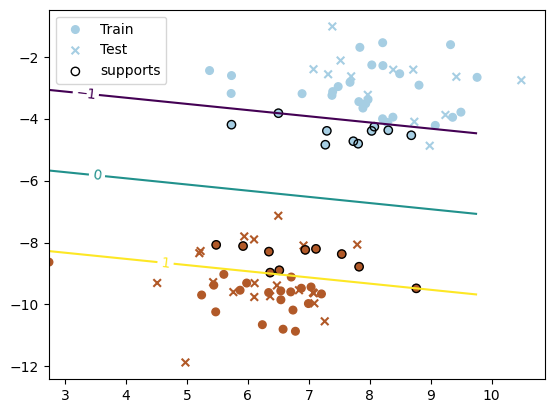

Best params: {'C': 0.1, 'gamma': 1e-05, 'kernel': 'linear'}
Test score: 0.8529411764705882


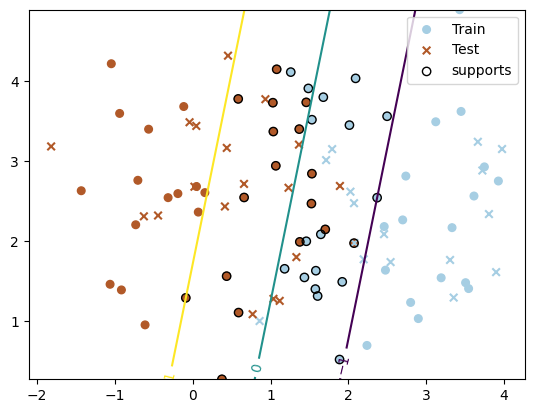

Best params: {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
Test score: 0.9626865671641791


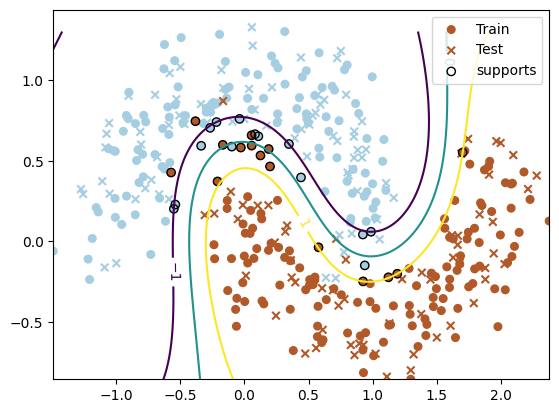

Best params: {'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
Test score: 0.9701492537313433


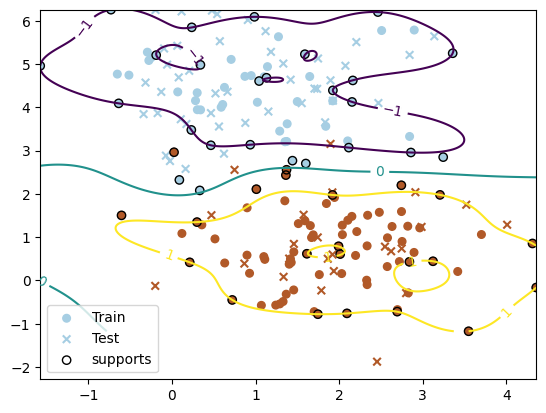

Best params: {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
Test score: 0.9580838323353293


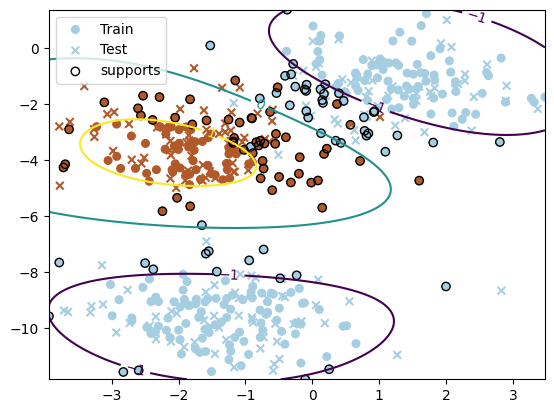

Best params: {'C': 0.1, 'gamma': 1.0, 'kernel': 'rbf'}
Test score: 0.9790419161676647


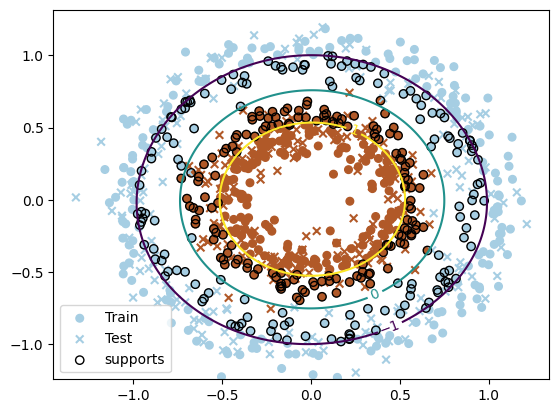

In [7]:
for X_train,t_train,X_test,t_test,X_grid in [linear(), easy(), moons(), blobs(), three_blobs(), circles()]:


  param_grid={'gamma':np.logspace(-5,3,9),
              'C':np.logspace(-2,2,5),
              'kernel':['linear','rbf']}

  clf = GridSearchCV(SVC(),param_grid=param_grid)
  clf.fit(X_train,t_train)

  y_grid = clf.decision_function(X_grid) #Resultado de decision_function en X_grid

  supports = clf.best_estimator_.support_vectors_ # Resultado del atributo support_vectors_

  print('Best params:',clf.best_params_)
  print('Test score:',clf.score(X_test,t_test))

  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

In [8]:
import pandas as pd
pd.DataFrame(clf.cv_results_).to_csv('results.csv')

# Actividad 6 (Optical Character Recognition):

Para la base de datos de dígitos escritos a mano, entrene una SVM que los clasifique. La función **kernel**, el parámetro de regularización **C** y los hiperparámetros de la función kernel serán los parámetros libres. Emplee la clase `sklearn.model_selection.GridSearchCV` para explorar difentes configuraciones de parámetros.

Explore los resultados obtenidos del atributo `cv_results_`.

La base de datos DIGITS contiene 1797 muestras en 64 dimensiones, distribuídas en las clases [0 1 2 3 4 5 6 7 8 9] .


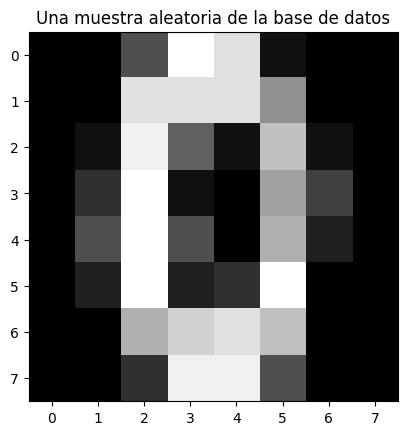

In [17]:
digits = load_digits()
X, y = digits.data, digits.target
print('La base de datos DIGITS contiene',X.shape[0],'muestras en',X.shape[1],'dimensiones, distribuídas en las clases',np.unique(y),'.')
#A random sample:
ind=np.random.randint(low = 0, high = X.shape[0], size = 1);
plt.imshow(X[ind,:].reshape((8,8)),cmap=plt.get_cmap('gray'))
plt.title('Una muestra aleatoria de la base de datos')
plt.show()

Acierto de clasificación para el conjunto de prueba: 0.843984398439844


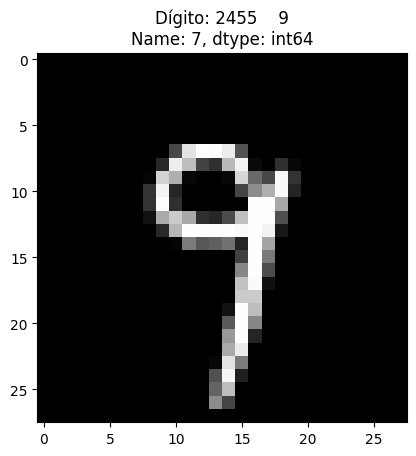

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Asumiendo que X_train y X_test son listas de listas o arrays 2D
# Convertir a arrays 2D si es necesario
X_train = np.array(X_train)
X_test = np.array(X_test)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convertir las etiquetas a enteros
t_train = t_train.astype(int)
t_test = t_test.astype(int)

# Entrenar el modelo SVM
svm = SVC(kernel='linear', C=1)
svm.fit(X_train, t_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = svm.predict(X_test)

# Calcular la precisión
score_test = accuracy_score(t_test, y_pred)

print('Acierto de clasificación para el conjunto de prueba: {}'.format(score_test))

# Función para visualizar una imagen
def plot_mnist(X, t, y, ind):
    plt.imshow(X[ind, :].reshape((28, 28)), cmap=plt.get_cmap('gray'))
    plt.title('Dígito: {}'.format(t[ind]))
    plt.show()

# Visualizar una imagen aleatoria del conjunto de prueba
ind = np.random.randint(low=0, high=X_test.shape[0], size=1)
plot_mnist(X_test, t_test, y_test, ind)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_digits

# Cargar el conjunto de datos de dígitos escritos a mano
digits = load_digits()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Definir el modelo SVM
svm = SVC()

# Definir los parámetros a explorar
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4, 5]
}

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo
grid_search.fit(X_train, y_train)

# Explorar los resultados
print("Mejores parámetros encontrados: ", grid_search.best_params_)
print("Mejor puntuación de validación cruzada: ", grid_search.best_score_)

# Explorar los resultados detallados de GridSearchCV
cv_results = grid_search.cv_results_

# Imprimir los mejores parámetros para cada combinación de parámetros
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(params, mean_score)




Mejores parámetros encontrados:  {'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Mejor puntuación de validación cruzada:  0.9867813588850174
{'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kernel': 'linear'} 0.9721568912117693
{'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kernel': 'poly'} 0.10716705381339528
{'C': 0.1, 'degree': 2, 'gamma': 0.001, 'kernel': 'rbf'} 0.34585027100271004
{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'linear'} 0.9721568912117693
{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'} 0.4564992257065429
{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'rbf'} 0.9297135114208285
{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'linear'} 0.9721568912117693
{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'} 0.9867813588850174
{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'} 0.34584785133565615
{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'linear'} 0.9721568912117693
{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'} 0.9867813588850174
{'C': 0.1, 'd